# EDA con Visualización 📊 

<strong>Objetivos</strong>:
+ Hallar insights y crear gráficos para la presentación.

## Importar librerías/utilidades y cargar datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Para ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargar datos
datos = pd.read_csv('../2da-tarea/datasets-output/final_dataset.csv')
datos

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,9/4/21 2:46,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,28/3/21 21:15,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,4/8/20 5:40,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,4/10/20 22:26,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,18/9/20 10:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,31/10/20 3:58,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,25/6/20 15:12,GIF,culture,positive,72


## Insights

### ¿Cuántas categorías únicas hay?

In [3]:
# Obtener todas las categorías únicas
categorias_unicas = pd.DataFrame(datos['Category'].unique(), columns=['Categorias Unicas'])
categorias_unicas

,Categorias Unicas
0,studying
1,healthy eating
2,dogs
3,public speaking
4,science
5,tennis
6,food
7,fitness
8,soccer
9,education


### ¿Cúantas reacciones hay para la categoría más popular (animals)?

In [4]:
# Seleccionar solo las filas donde la categoría sea 'animals'
datos_animales = datos[datos['Category'] == 'animals']
# Contar la cantidad de reacciones en la columna "Reaction Type"
cantidad_reacciones = datos_animales['Reaction Type'].count()
print(f"La cantidad de reacciones a posts de la categoría 'animals' es: {cantidad_reacciones}")

La cantidad de reacciones a posts de la categoría 'animals' es: 1897


### ¿Cúal ha sido el mes con más posts?

In [5]:
# Convertir la columna 'Datetime' en tipo datetime para poder extraer el mes
datos['Datetime'] = pd.to_datetime(datos['Datetime'])
# Agregar una columna con el mes correspondiente a cada fecha
datos['Mes'] = datos['Datetime'].dt.month
# Agrupar los datos por mes y contar la cantidad de posts en cada mes.
posts_por_mes = datos.groupby('Mes')['Content ID'].count()
# Obtener el mes con la mayor cantidad de posts.
mes_max_posts = posts_por_mes.idxmax()
print(f"El mes con más posts es el número {mes_max_posts}")

El mes con más posts es el número 1


In [6]:
# Validar
datos['Mes'].value_counts()

Mes
1     2142
7     2116
5     2110
12    2099
10    2087
6     2068
11    2055
8     2055
9     1991
3     1982
4     1978
2     1890
Name: count, dtype: int64

Efectivamente, el mes de enero ha sido el mes con más posts, específicamente con 2142 posts.

## Gráficos

In [7]:
# Obtener la suma de las puntuaciones por categorías
scores = datos.groupby('Category')['Score'].sum().reset_index(name='Popularity')
scores

,Category,Popularity
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


In [8]:
# Obtener las 5 categorías más populares
top_categories = scores.sort_values(by='Popularity', ascending=False).head(5)
top_categories

,Category,Popularity
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


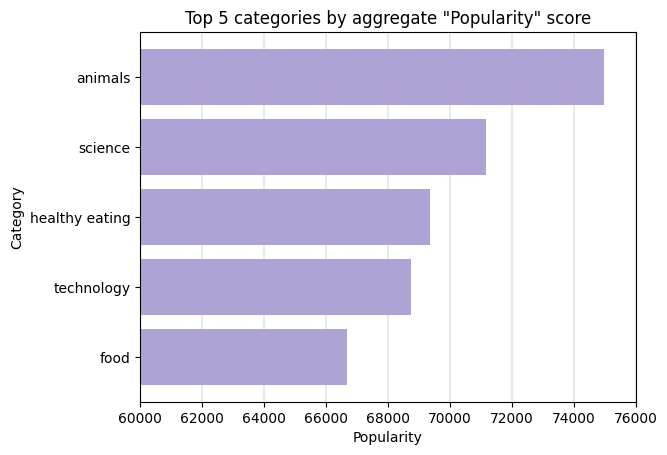

In [9]:
# Graficar las categorías por popularidad
fig, ax = plt.subplots()

plt.barh(top_categories['Category'][::-1], top_categories['Popularity'][::-1], color='#AFA3D5', zorder=2)

plt.title('Top 5 categories by aggregate "Popularity" score')
plt.xlabel('Popularity')
plt.ylabel('Category')
plt.xlim(60000, 76000)

for x in ax.get_xticks():
    ax.axvline(x=x, color='#CCD6DB', alpha=0.5, zorder=1)
    
plt.show()

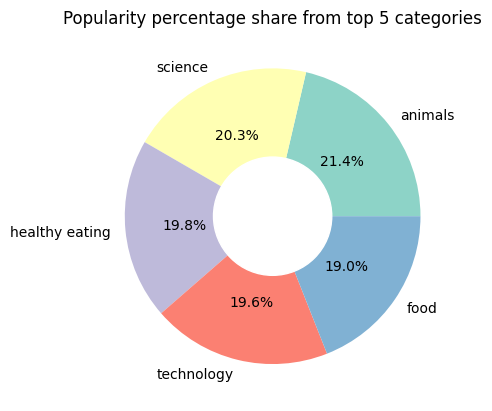

In [10]:
# Graficar el porcentaje de popularidad por categoría
total = scores['Popularity'].sum()
scores['Percentage'] = scores['Popularity'] / total * 100

top_categories = scores.sort_values('Popularity', ascending=False).head(5)

popularity = top_categories['Percentage'].tolist()
categories = top_categories['Category'].tolist()

colores = plt.cm.Set3(np.arange(len(top_categories)))

plt.pie(popularity, labels=categories, colors=colores, autopct='%1.1f%%')

circulo_central = plt.Circle((0,0), 0.4, color='white')
plt.gca().add_artist(circulo_central)

plt.title('Popularity percentage share from top 5 categories')
plt.show()